In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr
import random
import torch
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
from PIL import Image
import pathlib
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import glob
import torchvision
from torchvision import transforms
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import torch.optim as optim
import time
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
data_dir = pathlib.Path('images/images')

In [ ]:
artist_df = pd.read_csv('artists.csv')

In [ ]:
batch_size = 32
img_height, img_width = 224, 224
artists_names= sorted(artist_df['name'].str.replace(' ', '_').tolist())

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, 
    validation_split=0.3, 
    seed=123,
    subset='training',
    image_size=(img_height, img_width), 
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, 
    validation_split=0.3, 
    seed=123,
    subset='validation', 
    image_size=(img_height, img_width), 
    batch_size=batch_size
)

Found 8461 files belonging to 50 classes.
Using 5923 files for training.
Found 8461 files belonging to 50 classes.
Using 2538 files for validation.


In [ ]:
num_classes = 50
input_shape = (batch_size, img_height, img_width, 3)
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255,input_shape=(img_height, img_width, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#early_stop = EarlyStopping(monitor='val_loss', patience=10)
num_epochs = 30
start_time = time.time()
model_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=num_epochs,
    #callbacks=[early_stop]
)
end_time = time.time()
training_time = end_time - start_time

loss, accuracy = model.evaluate(val_ds)
print(f'Validation accuracy: {accuracy}')
print(f'Validation loss: {loss:.4f}')
training_time_minutes = round(training_time / 60, 2)
print(f"Training time: {training_time_minutes} minutes")

Epoch 1/30
186/186 [==============================] - 551s 3s/step - loss: 3.4779 - accuracy: 0.1298 - val_loss: 3.3037 - val_accuracy: 0.1682
Epoch 2/30
186/186 [==============================] - 32s 169ms/step - loss: 3.0729 - accuracy: 0.2092 - val_loss: 2.9466 - val_accuracy: 0.2482
Epoch 3/30
186/186 [==============================] - 33s 175ms/step - loss: 2.8220 - accuracy: 0.2668 - val_loss: 2.7849 - val_accuracy: 0.2778
Epoch 4/30
186/186 [==============================] - 32s 165ms/step - loss: 2.5035 - accuracy: 0.3331 - val_loss: 2.7560 - val_accuracy: 0.2939
Epoch 5/30
186/186 [==============================] - 32s 166ms/step - loss: 2.1043 - accuracy: 0.4212 - val_loss: 2.8730 - val_accuracy: 0.3026
Epoch 6/30
186/186 [==============================] - 33s 171ms/step - loss: 1.6513 - accuracy: 0.5387 - val_loss: 3.1557 - val_accuracy: 0.3101
Epoch 7/30
186/186 [==============================] - 31s 163ms/step - loss: 1.2294 - accuracy: 0.6468 - val_loss: 3.8254 - val_accu

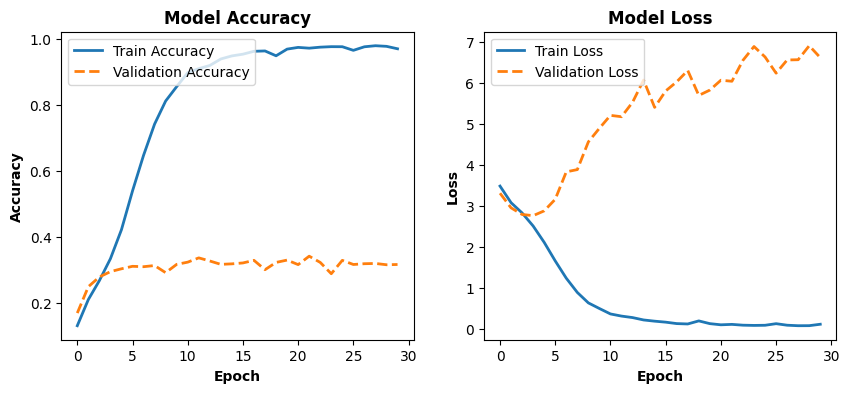

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(model_history.history['accuracy'], linestyle='-', linewidth=2, label='Train Accuracy')
ax1.plot(model_history.history['val_accuracy'], linestyle='--', linewidth=2, label='Validation Accuracy')
ax1.set_title('Model Accuracy', fontweight='bold')
ax1.set_ylabel('Accuracy', fontweight='bold')
ax1.set_xlabel('Epoch', fontweight='bold')
ax1.legend(loc='upper left')
ax2.plot(model_history.history['loss'], linestyle='-', linewidth=2, label='Train Loss')
ax2.plot(model_history.history['val_loss'], linestyle='--', linewidth=2, label='Validation Loss')
ax2.set_title('Model Loss', fontweight='bold')
ax2.set_ylabel('Loss', fontweight='bold')
ax2.set_xlabel('Epoch', fontweight='bold')
ax2.legend(loc='upper left')
plt.show()

In [ ]:
val_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_class_labels = [val_ds.class_names[label] for label in val_labels]
y_pred = model.predict(val_ds) 
y_pred_classes = np.argmax(y_pred, axis=1) 
y_pred_classes = y_pred_classes.tolist()

artists_names = sorted(artist_df['name'].str.replace(' ', '_').tolist())
n_artists = len(artists_names)
artist_dict = {}
for i in range(n_artists):
    artist_dict[i] = artists_names[i]

artist_names_pred = [artist_dict[label] for label in y_pred_classes]
artist_names_true = val_class_labels

print(classification_report(artist_names_true, artist_names_pred, zero_division=0))

80/80 [==============================] - 10s 104ms/step
                           precision    recall  f1-score   support

          Albrecht_Dürer       0.00      0.00      0.00        99
           Albrecht_Dürer       0.00      0.00      0.00         0
            Alfred_Sisley       0.01      0.01      0.01        73
        Amedeo_Modigliani       0.00      0.00      0.00        58
            Andrei_Rublev       0.02      0.04      0.03        26
              Andy_Warhol       0.00      0.00      0.00        38
         Camille_Pissarro       0.00      0.00      0.00        28
               Caravaggio       0.00      0.00      0.00        20
             Claude_Monet       0.00      0.00      0.00        24
             Diego_Rivera       0.00      0.00      0.00        23
          Diego_Velazquez       0.00      0.00      0.00        34
              Edgar_Degas       0.08      0.12      0.10       226
            Edouard_Manet       0.00      0.00      0.00        43
     

In [ ]:
precision = precision_score(artist_names_true, artist_names_pred, average='macro', zero_division=0)
print("Precision of the model", precision)
recall = recall_score(artist_names_true, artist_names_pred, average='macro', zero_division=0)
print("Recall of the model", recall)
f1 = f1_score(artist_names_true, artist_names_pred, average='macro', zero_division=0)
print("F1-score of the model", f1)

Precision of the model 0.01872901407931818
Recall of the model 0.01795059331702711
F1-score of the model 0.016958219254593326


In [ ]:
report = classification_report(artist_names_true, artist_names_pred, zero_division=0)

f1_scores = {}
for line in report.split('\n')[2:-5]:
    line = line.split()
    if len(line) == 0:
        continue
    class_name = line[0]
    f1_score = float(line[-1])
    f1_scores[class_name] = f1_score

top_classes = sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 classes by f1-score:")
for class_name, f1_score in top_classes:
    print(class_name)


Top 5 classes by f1-score:
Vincent_van_Gogh
Edgar_Degas
Pablo_Picasso
Albrecht_Dürer
Paul_Gauguin
